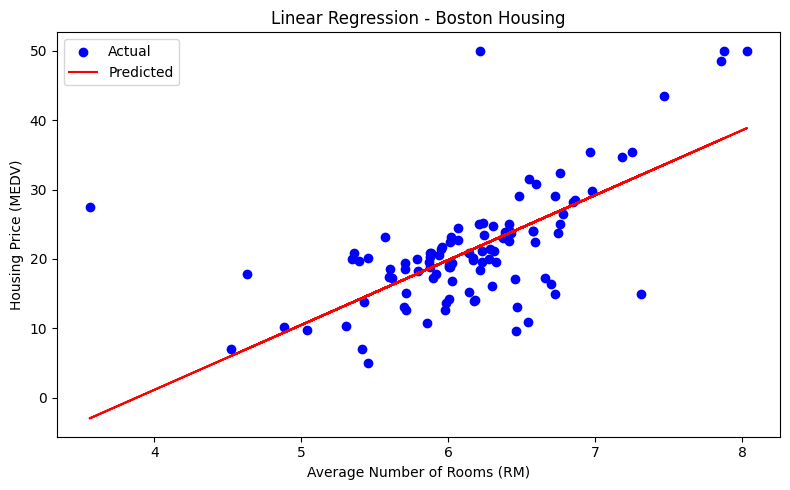

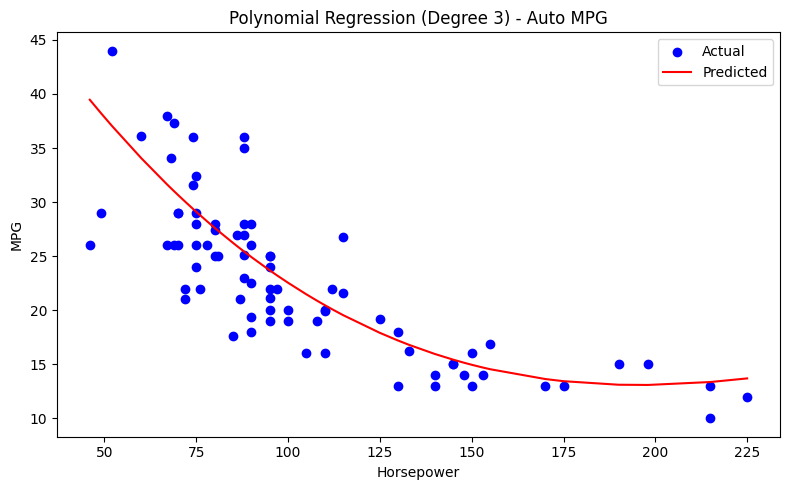

In [2]:
#Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# --- Linear Regression on Boston Housing Dataset ---
# Load Boston Housing dataset (CSV should contain 'RM' and 'MEDV' columns)
boston = pd.read_csv('Boston_housing_dataset.csv')
X_boston = boston[['RM']]
y_boston = boston['MEDV']

# Train-test split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Linear Regression
lr_boston = LinearRegression()
lr_boston.fit(Xb_train, yb_train)
yb_pred = lr_boston.predict(Xb_test)

# Plot Linear Regression results
plt.figure(figsize=(8,5))
plt.scatter(Xb_test, yb_test, color='blue', label='Actual')
plt.plot(Xb_test, yb_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Housing Price (MEDV)')
plt.title('Linear Regression - Boston Housing')
plt.legend()
plt.tight_layout()
plt.show()

# --- Polynomial Regression on Auto MPG Dataset ---
# Load Auto MPG dataset (CSV should contain 'horsepower' and 'mpg' columns)
auto = pd.read_csv('auto_mpg_old.csv', na_values='?')
auto = auto.dropna()  # Remove rows with missing values
X_auto = auto[['horsepower']].astype(float)
y_auto = auto['mpg'].astype(float)

# Train-test split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

# Polynomial Features (degree=3)
poly = PolynomialFeatures(degree=3)
Xa_train_poly = poly.fit_transform(Xa_train)
Xa_test_poly = poly.transform(Xa_test)

# Feature Scaling
scaler = StandardScaler()
Xa_train_poly_scaled = scaler.fit_transform(Xa_train_poly)
Xa_test_poly_scaled = scaler.transform(Xa_test_poly)

# Polynomial Regression
lr_poly = LinearRegression()
lr_poly.fit(Xa_train_poly_scaled, ya_train)
ya_pred = lr_poly.predict(Xa_test_poly_scaled)

# For smooth plotting, sort test data by horsepower
sorted_idx = Xa_test['horsepower'].argsort()
X_sorted = Xa_test['horsepower'].iloc[sorted_idx]
y_sorted = ya_test.iloc[sorted_idx]
yp_sorted = ya_pred[sorted_idx]

# Plot Polynomial Regression results
plt.figure(figsize=(8,5))
plt.scatter(Xa_test['horsepower'], ya_test, color='blue', label='Actual')
plt.plot(X_sorted, yp_sorted, color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression (Degree 3) - Auto MPG')
plt.legend()
plt.tight_layout()
plt.show()